<a href="https://colab.research.google.com/github/Navaneethadapa/BasicML/blob/main/eda_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## IMPORTING LIBRARIES FOR ADDITIONAL ANALYTICS

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## GIVING THE PATH OF THE DATA SET

In [12]:
data = pd.read_csv('/content/spotify_dataset.csv')

## READING THE PARTS OF DATA

In [13]:
#reading first five rows
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


### the top of the charts is Manseskin an Italian band who gained their popularity by winning the eurovision best band award

In [14]:
#reading last five rows
data.tail()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,"['pop', 'post-teen pop']",2019-11-13,2019-12-27--2020-01-03,70,0.448,0.603,-7.176,0.064,0.433,0.0862,205.272,221307,0.422,G


In [15]:
#checking for null values
data.isnull()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1552,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1553,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1554,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#finding the number of rows and columns in the data
data.shape

(1556, 23)

In [17]:
#names of the columns
data.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [18]:
#datatypes in the data sets
data.dtypes.value_counts()

object    20
int64      3
dtype: int64

In [19]:
#finding the null data
missing = data.isnull()

In [20]:
#bool read of the data; True --> existing, False --> Null
missing

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1552,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1553,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1554,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
#formulating the null values
missing = data.isnull().sum()

In [22]:
#info of the data set based on it's existence
missing

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [23]:
#formatting the data set
missing[missing>0]

Series([], dtype: int64)

## EXPLORATORY DATA ANALYSIS OF FORMATTED DATA

### VISUAL ANALYSIS

In [24]:
data['Artist'].describe()

count             1556
unique             716
top       Taylor Swift
freq                52
Name: Artist, dtype: object

#### OBSERVATION : describe() function gives the info on the desired key in the data set

### HISTOGRAM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


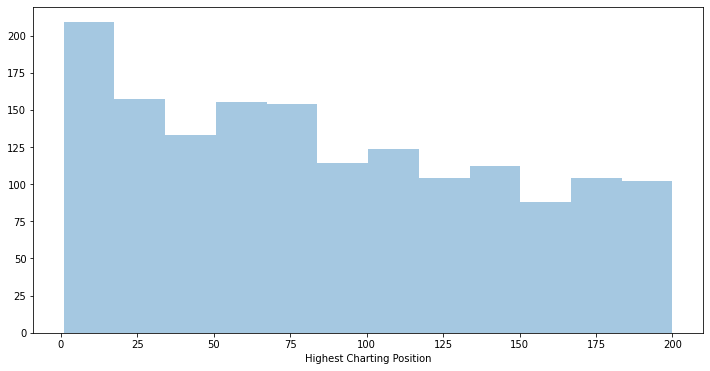

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(a = data["Highest Charting Position"], kde = False)

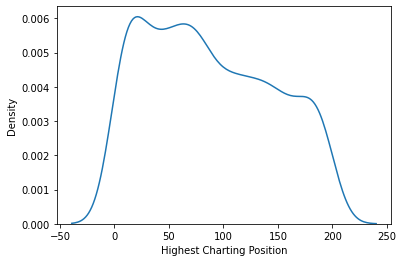

In [26]:
sns.kdeplot(data["Highest Charting Position"])

In [27]:
data["Highest Charting Position"].describe()

count    1556.000000
mean       87.744216
std        58.147225
min         1.000000
25%        37.000000
50%        80.000000
75%       137.000000
max       200.000000
Name: Highest Charting Position, dtype: float64

#### OBSERVATION : The following histograms gives the visual representation on the highest charting postions. 

### Scatter plots

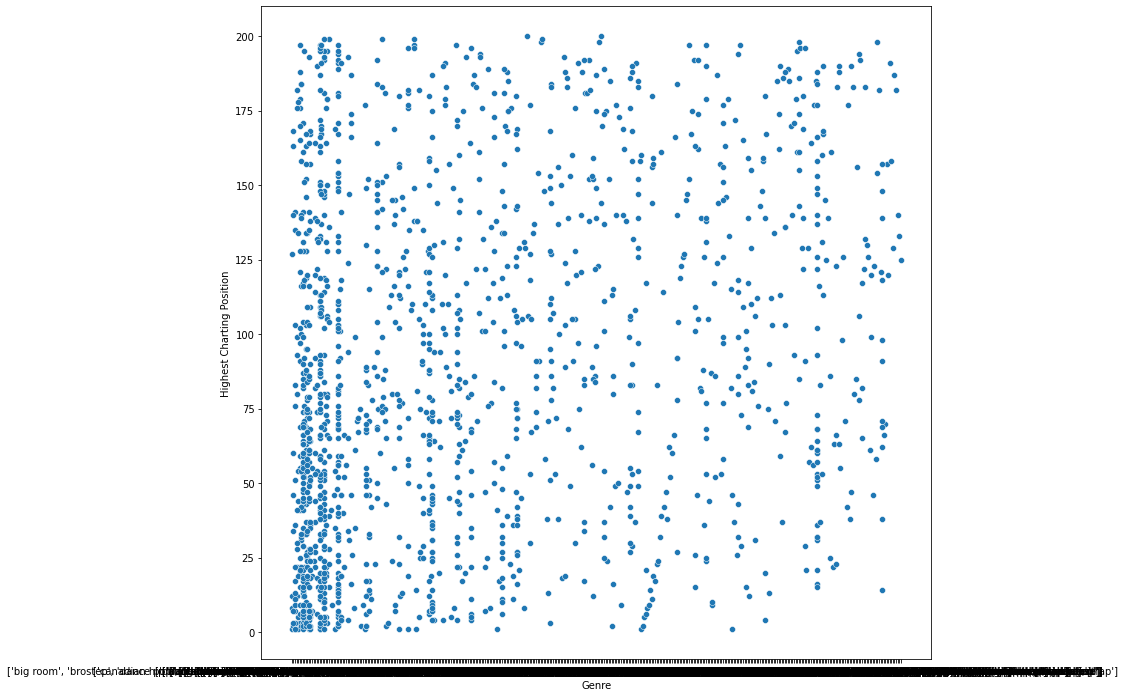

In [28]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = data["Genre"],y = data["Highest Charting Position"])

#### OBSERVATION : This scatter plot gives the correlation between genre and highest charting position.

### NUMERIC FEATURES

In [29]:
numeric_features1 = data.select_dtypes(exclude = ['O'])
numeric_features1.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted'], dtype='object')

In [30]:
numeric_features1.shape

(1556, 3)

### CATEGORICAL FEATURES

In [31]:
categorical_features = data.select_dtypes(include = [np.object])
categorical_features.columns

Index(['Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [33]:
categorical_features.shape

(1556, 20)

### CORRELATION FACTORS

In [34]:
correlation = numeric_features1.corr()
print(correlation['Highest Charting Position'].sort_values(ascending = False), '\n')

Highest Charting Position    1.000000
Index                        0.254341
Number of Times Charted     -0.417968
Name: Highest Charting Position, dtype: float64 



#### OBSEVATION : The release dates are in float and thus the correlation factors below.

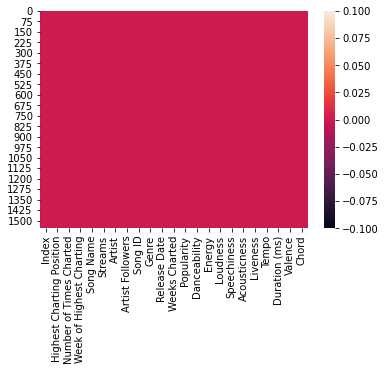

In [35]:
sns.heatmap(data.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


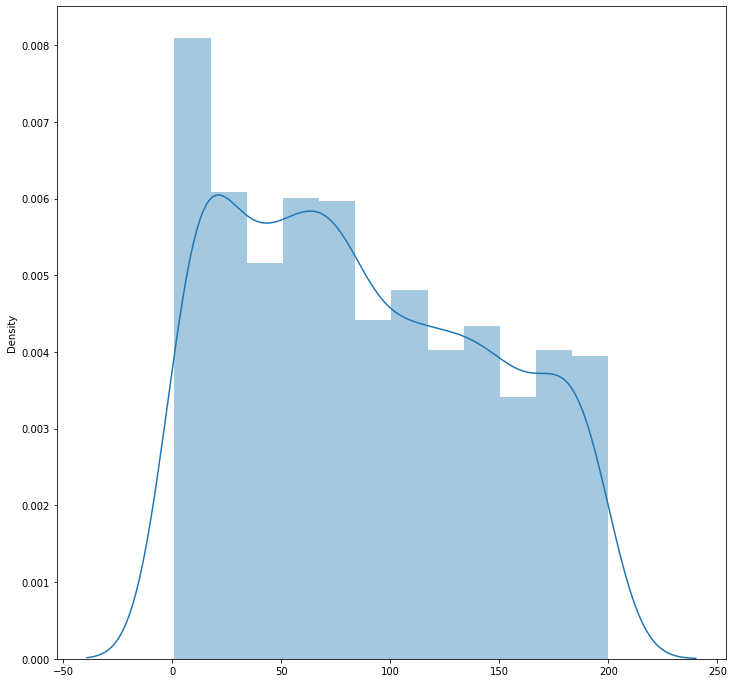

In [36]:
plt.figure(figsize=(12,12))
sns.distplot(x = data["Highest Charting Position"])

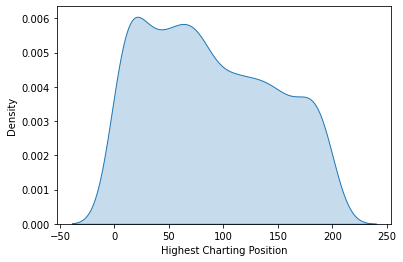

In [37]:
sns.kdeplot(x = data["Highest Charting Position"], shade=True)

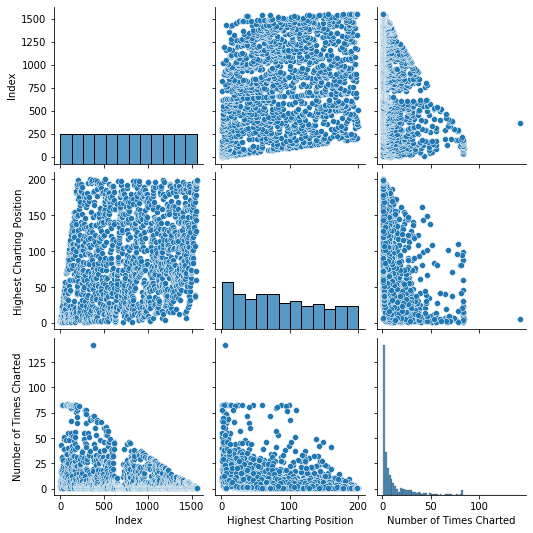

In [38]:
sns.pairplot(data , kind="scatter")

### Basic Info Pie charts

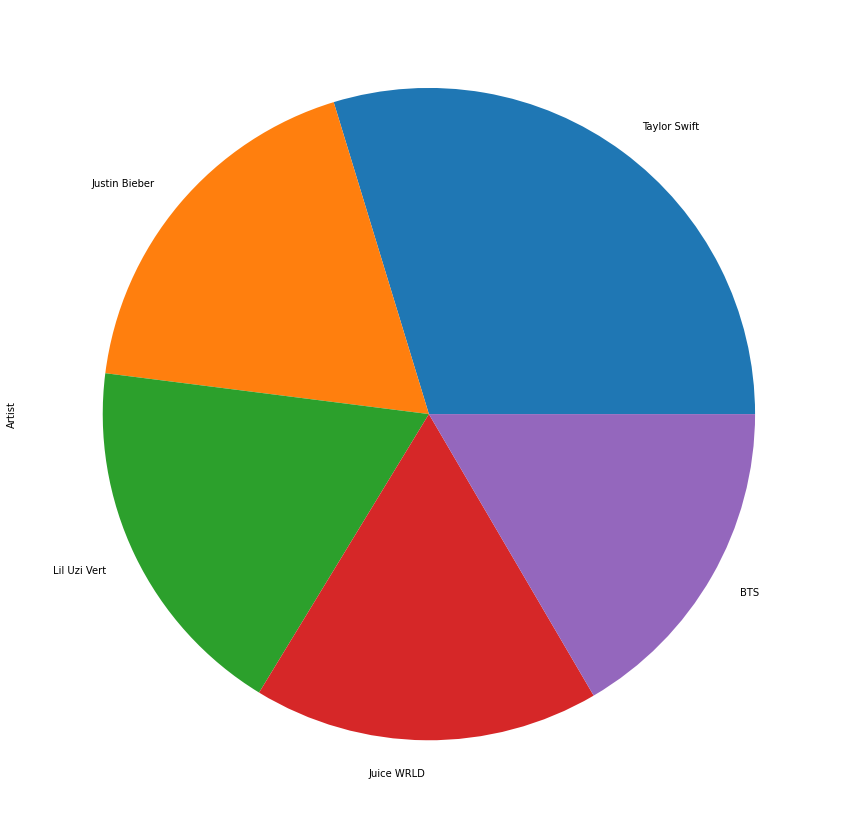

In [39]:
data["Artist"].value_counts()[:5].plot(kind='pie',figsize=(15,15))

In [40]:
dd=data[{"Artist","Highest Charting Position"}].value_counts()[:5].to_frame().reset_index()
dd

,Artist,Highest Charting Position,0
0,Justin Bieber,5,3
1,Drake,2,3
2,Ariana Grande,20,3
3,Taylor Swift,10,2
4,Lil Uzi Vert,32,2


# Conclusion
### Thus the following is the exploratory data analysis of spotify's trends and music popularity
